<a href="https://colab.research.google.com/github/zhangxiaoyuan525/Webacy-program/blob/main/Clustering_Analysis_of_Smart_Contract_Risk_Tags_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Analysis of Smart Contracts

**INTRODUCTION**



Smart contracts are autonomous digital agreements encoded on blockchain platforms, pivotal for powering decentralized applications. Their self-executing nature, premised on predefined conditions within the blockchain, provides a revolutionary mechanism for agreement automation and enforcement without the need for traditional intermediaries. However, this innovation is not without its challenges. The immutable and transparent characteristics of smart contracts, while beneficial for security and trust, inherently carry significant vulnerabilities. These vulnerabilities, if exploited due to any flaws in contract design or logic, can lead to dire consequences such as considerable financial losses and breaches of data integrity.

Given the critical role that smart contracts play in the blockchain ecosystem, it is essential to employ comprehensive risk management strategies to address these vulnerabilities effectively. Among these strategies, clustering analysis emerges as a powerful tool to enhance the understanding and mitigation of smart contract risks:


1.   **Cluster-Based Risk Identification:**


*   **Categorization of Risks:** Clustering analysis allows for the grouping of similar risk types based on their characteristics and behaviors within the smart contract framework. This aids in categorizing risks into distinct clusters that can be studied and addressed collectively.
*   **Insight into Common Patterns:** By observing how different risks cluster together, developers and security analysts can identify common patterns and triggers of vulnerabilities, facilitating targeted interventions.


2.   **Enhanced Mitigation Strategies:**


*   **Focused Remediation Efforts:** Understanding the cluster dynamics of smart contract risks enables developers to tailor specific mitigation strategies that are more focused and effective, rather than applying broad, generic solutions.
*   **Preventive Measures:** Clustering analysis not only helps in reacting to existing risks but also in anticipating potential vulnerabilities. This predictive capability allows for the implementation of preventive measures, reducing the likelihood of risk manifestation.

3. **Efficient Resource Allocation:**


*   **Prioritization of High-Risk Clusters:** By determining which clusters represent a higher threat or are more frequent, resources can be strategically allocated to address the most critical vulnerabilities first.

In summary, clustering analysis is an indispensable analytical technique in the arsenal of blockchain developers and security experts focused on smart contracts. By systematically grouping and analyzing the risks associated with these digital agreements, the blockchain community can enhance its defensive measures, thereby fostering a more secure and resilient environment for deploying smart contracts. This proactive and strategic approach to risk management is pivotal in advancing the reliability and trustworthiness of blockchain technology. Let's delve deeper into how clustering analysis can revolutionize smart contract security.





Now before we explore the data, we need to load necessary libraries in Python and load the data into this project to make whole progress well prepared.

###Step 1: Import libraries

In [ ]:
#Import necessary Python libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster

print("Libraries imported successfully!")


Libraries imported successfully!


###Step 2: Download the Dataset and Load the Data Section

Now we are going to load the targetted data set into our Python enviroment. For this we will utilize the Pandas library.

In [ ]:
# Loading the dataset
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTKEMHMAzQdcP_vAhfBQprgVzDxlaT4Xc_4R6dOHNQC38Isc4EjXwaUHyD88tPMNA/pub?output=csv'
data = pd.read_csv(url)
# Display the first five rows of the dataframe
data.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [ ]:
# Check the data types and null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                967 non-null    object
 1   Smart contract address                      967 non-null    object
 2   Blog post link                              967 non-null    object
 3   Audit website                               967 non-null    object
 4   Chain                                       967 non-null    object
 5   Is_closed_source                            967 non-null    bool  
 6   hidden_owner                                967 non-null    bool  
 7   anti_whale_modifiable                       967 non-null    bool  
 8   Is_anti_whale                               967 non-null    bool  
 9   Is_honeypot                                 967 non-null    bool  
 10  buy_tax                   

In [ ]:
data.columns

Index(['project_name', 'Smart contract address', 'Blog post link',
       'Audit website', 'Chain', 'Is_closed_source', 'hidden_owner',
       'anti_whale_modifiable', 'Is_anti_whale', 'Is_honeypot', 'buy_tax',
       'sell_tax', 'slippage_modifiable', 'Is_blacklisted',
       'can_take_back_ownership', 'owner_change_balance', 'is_airdrop_scam',
       'selfdestruct', 'trust_list', 'is_whitelisted', 'is_fake_token',
       'illegal_unicode', 'exploitation', 'bad_contract',
       'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths',
       'Summary/rationale of risk tags marked true'],
      dtype='object')

###Feature Selection

As we have got the visualization from the frequency and correlation analysis report before (https://colab.research.google.com/drive/1K1TNlo0HXPVhpxH_UFOBt3b8lEUXz5aY?usp=sharing), we could dive deep into these risk tags that marked as most frequent or special to get some insight information from their back.

In [ ]:
data_new = data.copy()
# We are going to analyze the feature of encode_packed_collision, bad_contract, exploitation, buy_tax, sell,tax
feature_1 = 'encode_packed_collision'
feature_2 = 'bad_contract'
feature_3 = 'exploitation'
feature_4 = 'buy_tax'
feature_5 = 'sell_tax'
selected_features = data_new[[feature_1, feature_2, feature_3, feature_4, feature_5]].replace({True:1, False:0})
print("Features selected for clustering:")

print(selected_features.head)

Features selected for clustering:
   encode_packed_collision  bad_contract  exploitation  buy_tax  sell_tax
0                      0.0           1.0             1        0         0
1                      1.0           1.0             0        1         0
2                      1.0           0.0             1        0         0
3                      1.0           0.0             1        0         1
4                      0.0           0.0             1        0         0


# Applying Clustering

###Hierarchical Clustering with Jaccard Distance

We are going to apply hierarchical clustering to our dataset using Jaccard distance which is particularly effective for datasets with binary arributes as it measures the dissimilarity between sample sets.

###Compute Jaccard Distance

Compute the pairwise Jaccard distance between observations.(Jaccard distance is a measure of how dissimilar two sets are, ranging from 0(identical) to 1 (no common elements)).

In [ ]:
from scipy.spatial.distance import pdist, squareform

# Compute Jaccard distance
distance_matrix = pdist(selected_features, metric='jaccard')

#Convert to square matrix
distance_matrix = squareform(distance_matrix)

###Perform Hierarchical Clustering

Using the complete linkage method, weperform hierarchical clustering. Complete linkage considers the maximum distance between observations in two clusters.

In [ ]:
import scipy.cluster.hierarchy as sch

#Create linkage matrix
linkage_matrix = sch.linkage(distance_matrix, method='ward')

<ipython-input-7-9b50022c90c5>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = sch.linkage(distance_matrix, method='ward')


In [ ]:
linkage_matrix

array([[   0.        ,    9.        ,    0.        ,    2.        ],
       [  28.        ,   45.        ,    0.        ,    2.        ],
       [   5.        ,  408.        ,    0.        ,    2.        ],
       ...,
       [1701.        , 1846.        ,  134.02799708,  345.        ],
       [1929.        , 1930.        ,  166.99949839,  575.        ],
       [1900.        , 1931.        ,  492.41155731,  967.        ]])

###PLot the Dendrogram

Visualize the clustering as a dendrogram, which will help us understand the data's hierarchical structure.

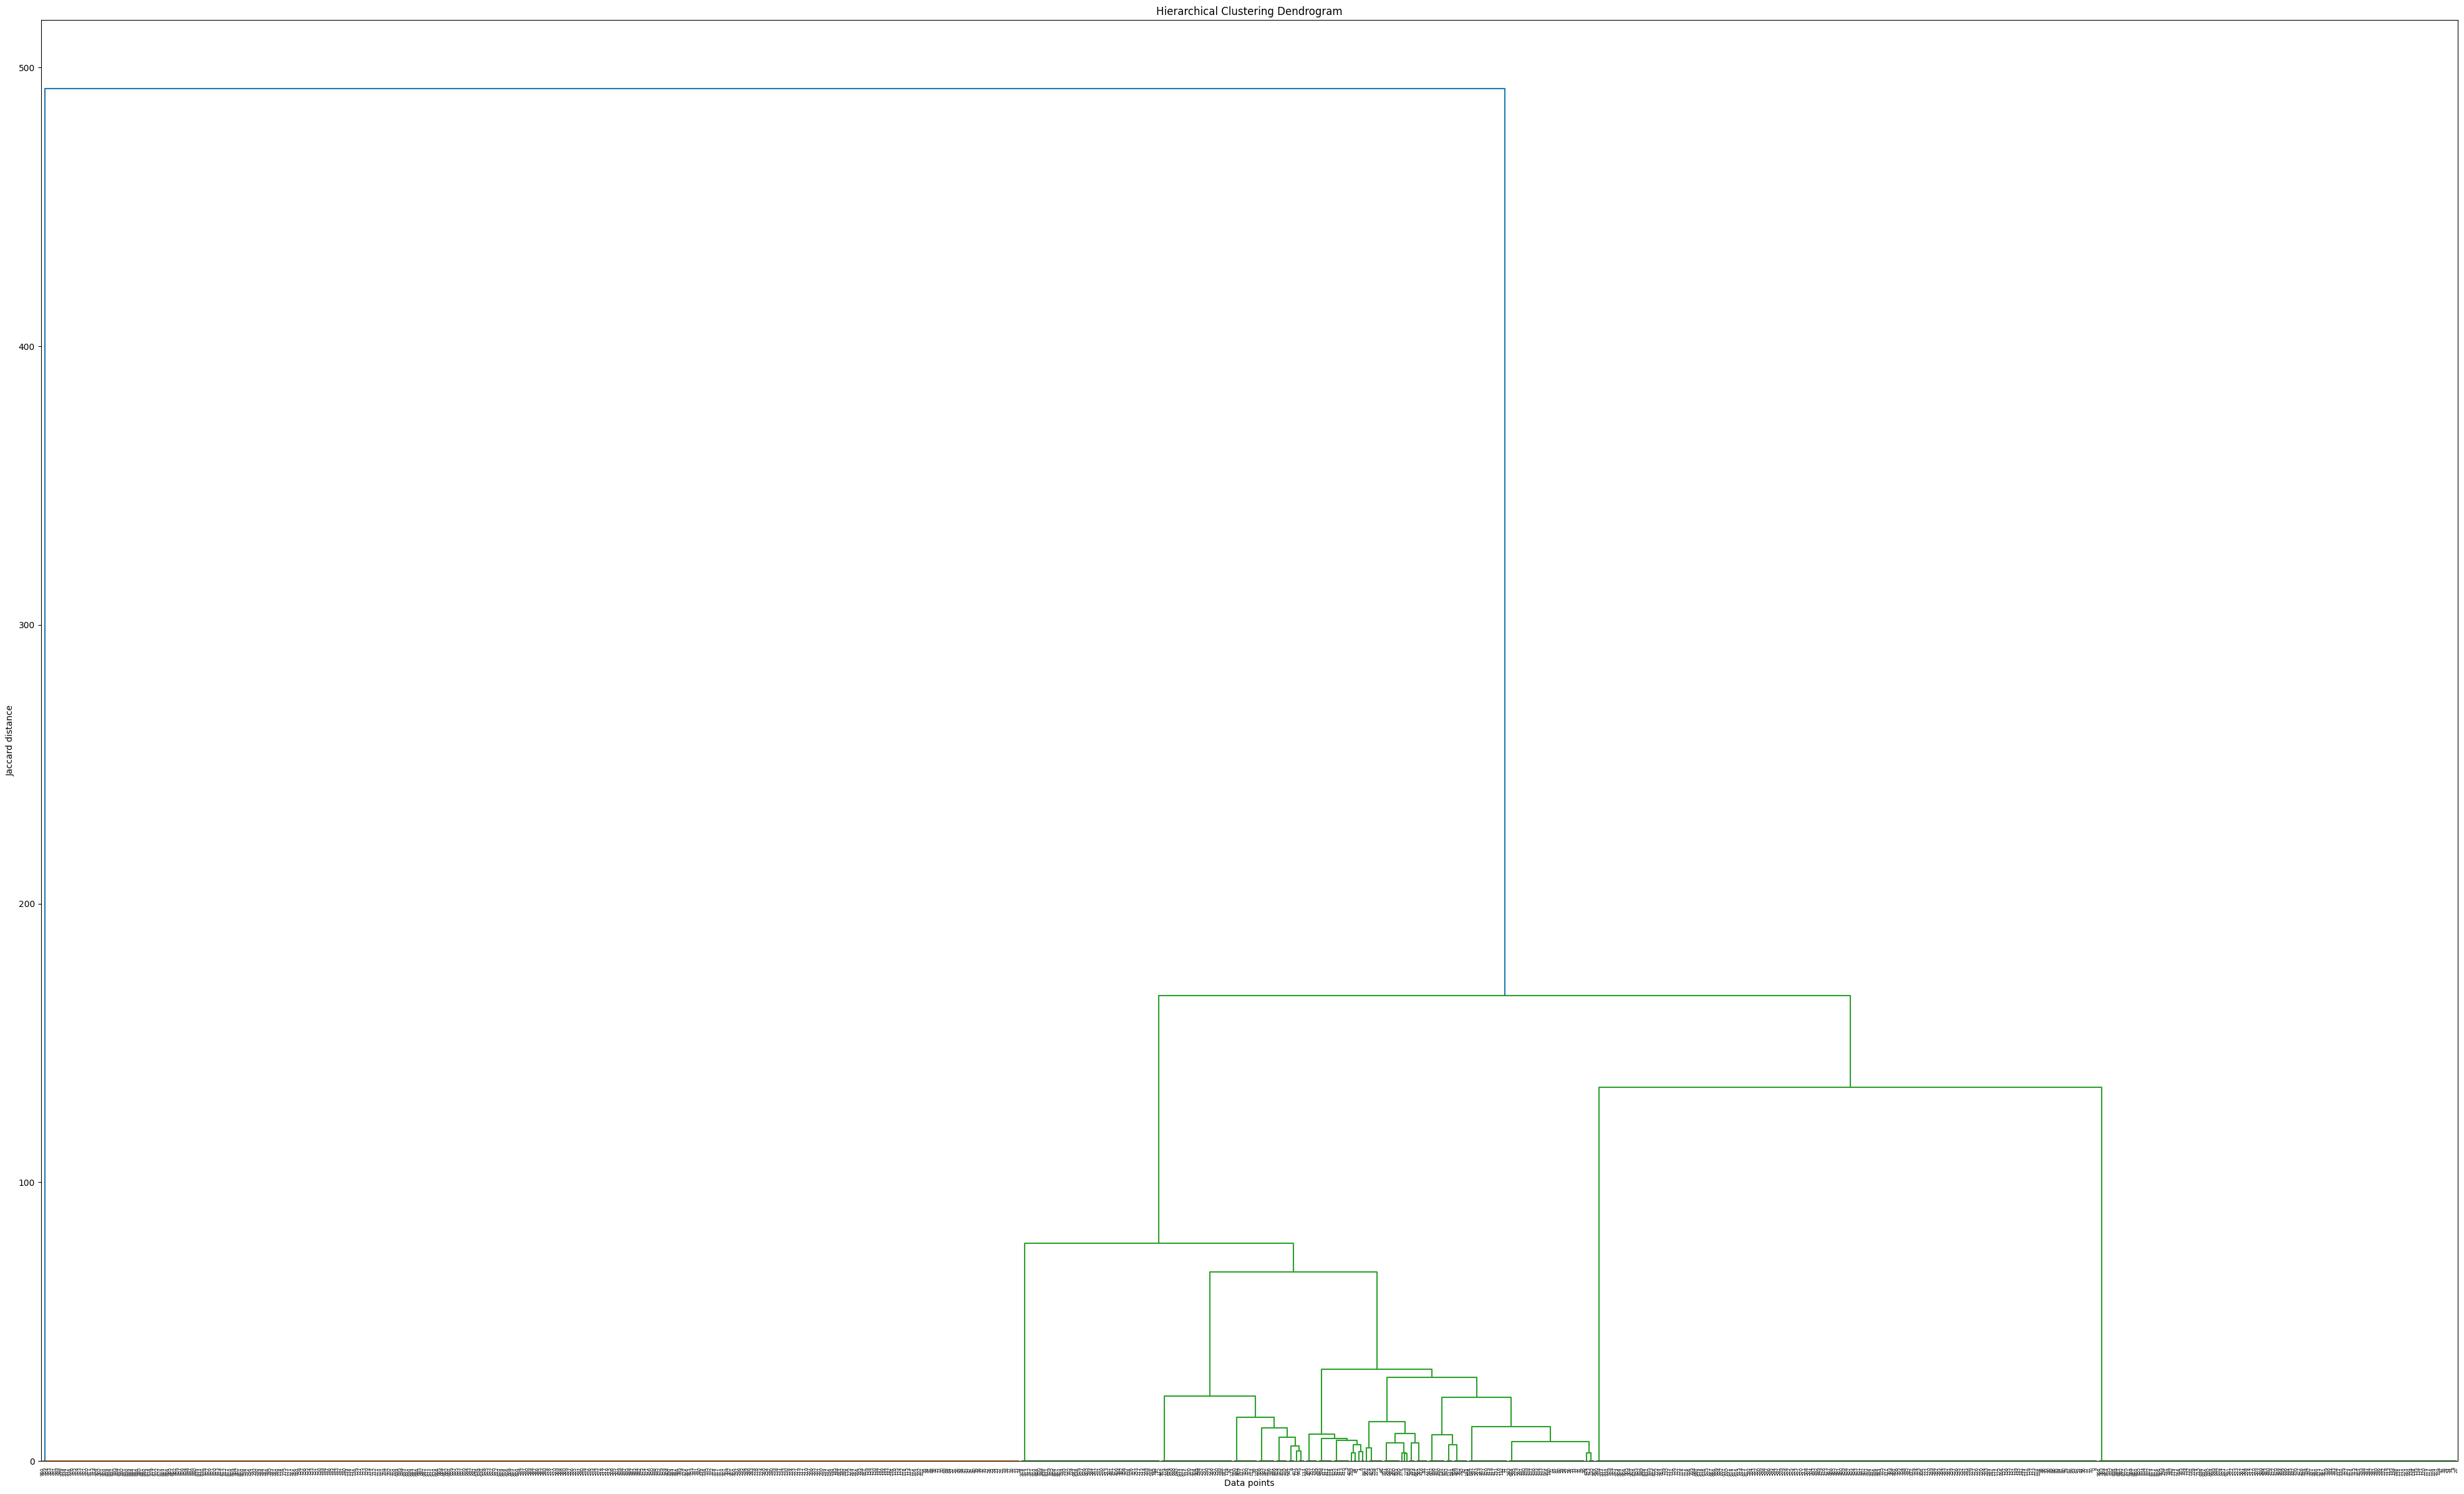

In [ ]:
# Plot the dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 30))
dendrogram = sch.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Jaccard distance')
plt.show()

###Analyze the dendrogram

The dendrogram shows how each cluster is linked, with the y-axis representing the distance(dissimilarity) at which clusters are merged. The height of the merge point indicates the similarity between clusters: lower height suggest similarity.

This is the dendogram that we received from our clustering. Here, Vertical Lines represent individual clusters or data points being linked together. The height of the line where two clusters join indicates the Jaccard distance between those clusters.

Horizontal Lines serve as connectors and do not represent distance.
It is very clear that we would get two clusters in this case. Some more observations from the dendogram:

**Large Blue Vertical Line:**


*   **Height:** Extends up to a Jaccard distance of approximately 500, which is significant, suggesting a substantial dissimilarity.
*   **Implication:** This large distance before any linkage suggests that the cluster formed at this point significantly differs from the other data points or clusters below this level.




**Green Cluster Groupings:**


*   **Sub-clusters:** The green lines at the bottom of the dendrogram indicate several small clusters and sub-clusters merging at lower distances.
*   **Close Proximity:** These shorter green lines suggest that these data points or sub-clusters are more similar to each other, as they merge at shorter Jaccard distances.






**Optimal Number of Clusters Cut-Off Point:**

 Given the significant jump in distance represented by the tall blue line, a practical cut-off point for determining the number of clusters might be just below this height, which would suggest considering everything below it as separate clusters.

**Number of Clusters:** From the dendrogram, it appears that cutting just below the height of around 150 or just above 100 would result in two major clusters:
One large cluster grouping almost all the points linked by the green lines which could be seperated into two small clusters.
One cluster or outlier represented by the point that joins at the top of the blue line.

In this project, we are going to probe this data by 3 clusters.

# Visualizing Clusters

Now we are going to visualize the clusters formed based on the selected binary risk tags above.

In [ ]:
# Set maximum distance at 1.5 for cluster formation
cluster_labels = fcluster(linkage_matrix, t=150, criterion='distance')

# Add cluster labels back to the original DataFrame
data_new['Cluster'] = cluster_labels

#Summary statistics for each cluster
cluster_summary = data_new[[feature_1, feature_2, feature_3, feature_4, feature_5, 'Cluster']].groupby('Cluster').agg(['mean', 'std', 'median', 'count'])
cluster_summary

encode_packed_collision                        bad_contract            \
                           mean       std median count         mean       std   
Cluster                                                                         
1                           0.0  0.000000    0.0   392          0.0  0.000000   
2                      0.349345  0.477808    0.0   229     0.641921  0.480486   
3                           0.0  0.000000    0.0   345     0.582609  0.493845   

                     exploitation                          buy_tax            \
        median count         mean       std median count      mean       std   
Cluster                                                                        
1          0.0   392          0.0  0.000000    0.0   392  0.000000  0.000000   
2          1.0   229          0.4  0.490966    0.0   230  0.508696  0.501015   
3          1.0   345          1.0  0.000000    1.0   345  0.000000  0.000000   

                      sell_tax                         
        median count      mean       std median count  
Cluster                                                
1          0.0   392  0.000000  0.000000    0.0   392  
2          1.0   230  0.517391  0.500787    1.0   230  
3          0.0   345  0.000000  0.000000    0.0   345

Now we shall plot histogram of cluster labels to see distribution of cluster sizes

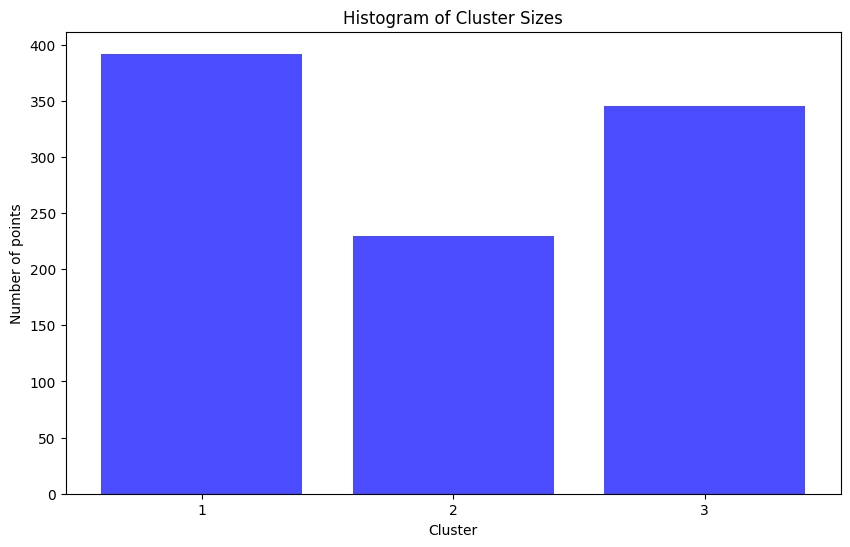

In [ ]:
# Plot histogram of cluster labels to see distribution of cluster sizes
plt.figure(figsize=(10, 6))
plt.hist(cluster_labels, bins=np.arange(1, np.max(cluster_labels)+2)-0.5, rwidth=0.8, color = 'blue', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Number of points')
plt.xticks(np.arange(1, np.max(cluster_labels)+1))
plt.title('Histogram of Cluster Sizes')
plt.show()

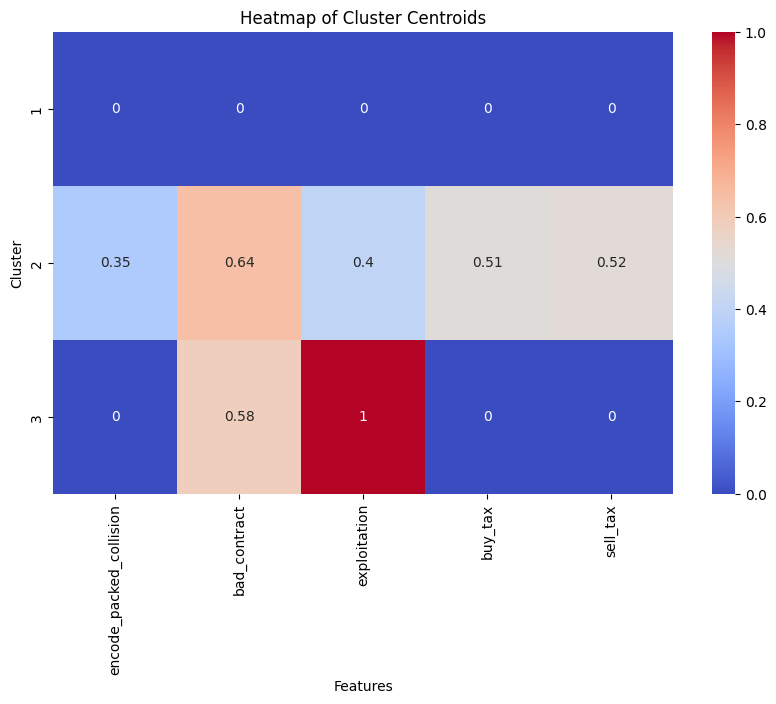

In [ ]:
# Calculate the mean for each cluster and feature
cluster_centers = data_new[[feature_1, feature_2, feature_3, feature_4, feature_5, 'Cluster']].groupby('Cluster').mean()
cluster_centers = cluster_centers.apply(pd.to_numeric, errors='coerce')
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers, annot=True, cmap='coolwarm')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.title('Heatmap of Cluster Centroids')
plt.show()

Here we observe that:


*   Cluster 1: All features are 0. This suggests that this cluster groups the smart contracts (or other entities) that do not have the risk factors being measured. These might be considered the 'safest' or least problematic contracts in terms of the specific risks tracked.
*   Cluster 2: 'buy_tax' (0.51) and 'sell_tax' (0.52) combined with 'bad_contract' (0.54) have a high average, while 'encode_packed_collision' and 'exploitation' are slightly lower(0.35 and 0.0.4 respectively). This indicates that this cluster predominantly consists of contracts where there is likely hidden taxes in selling and buying that makes it a bad contract facing the risk of collapsing while they are also fragile for data is tightly packed together and there is hidden flaw in a safe to crack it open and steal the contents(steal funds or disrupt operations).

*   Cluster 3: The average for 'exploitation' in this cluster is shown as 1, while 'bad_contract' has an average as 0.58 and the other 3 is 0. It indicates that
all smart contracts in this cluster is under the risk of being taken advantage of vulnerabilities to steal funds or disrupt operations and make them bad contracts. There are no hiden taxes in selling or buying
 and data is not tightly packed here.

# Summary of Insights



1.   **Risk Profiling:**


*   **Cluster 1:** Cluster 1 might represent a 'low-risk' group where none of the surveyed risk factors are prominent.
*   **Cluster 2:** Cluster 2 appears to represent contracts that might be used for more obscure or potentially shady purposes given the high incidence of all possible risk tags we focus here. The relatively high presense of all risks could mean these contracts are not sophisticated or careful designed that would trigger these security vulnerabilities.
*   **Cluster 3:** Cluster 3 appears to represent contracts which are under the risk of being taken advantages of vulnerabilities to steal funds or disruptive operations and this might be the reason why they are defined as bad contracts. Also, other risk tags that Cluster 2 shows us are not found here, which indicates that these contracts are sophisticated or careful not to trigger common security vulnerabilities.


2.   **Targeted Actions or Further Analysis:**


*   **For Cluster 1,** further investigation could could confirm if these contracts indeed represent best practices or if they have other less common risks not captured by the current data.
*   **For Cluster 2,** deeper dives could be done to understand why these contracts are under all these risks, for example, try to find out why hidden taxes in buying and selling are often found in these contracts. Are there legitimate privacy or security reasons, or might it suggest potential for misuse? Additional features could be analyzed to determine if there are other subtle risk factors associated.
*   **For Cluster 3,** we should focus ont he reason why these contracts all have the same risk tag: 'exploitation'. Try to capture the similarity that they have so that this risk tag is well found among them. Like the cluster two, more features are suggested to analyze so that we may determine whether there are other assocaited factors are hidden in these contracts.

3. **Policy or Monitoring Adjustments:**


*   Contracts in Cluster 2 might warrant stricter monitoring or additional scrutiny in audit processes, particularly focusing on legality and transparency issues to get rid of being under high risks of plentiful risks
*   Contracts in Cluster 3 should be paid more attention to security check and make sure no hidden flaws or vulnerabilities are taken advantages of or exposed to the potential attackers so that stealing funds or disrupting operations could be avoided.
*   Enhancements in risk detection tools might be necessary to better capture the nuanced risk profiles observed in different clusters.

* **Adaptive Compliance Protocols:**
  * **Customized Compliance Checks** For contracts falling within specific risk clusters, especially those associated with high-risk vulnerabilities, it may be crucial to develop customized compliance protocols. These protocols could focus on the unique aspects of each cluster, ensuring that the smart contracts comply with both internal governance standards and external regulatory requirements.

  * **Dynamic Legal Frameworks:** Adapting legal frameworks to accommodate the specific needs and risk factors of different clusters can help in preempting legal issues. This involves aligning contract terms and operations with the latest legal standards pertinent to the nature of risks identified in each cluster.

* **Advanced Monitoring Techniques:**

  * **Real-Time Risk Tracking:** Implementing real-time monitoring systems that specifically track the emergence of risk factors associated with particular clusters can provide early warnings to developers and stakeholders. This proactive surveillance helps in timely interventions before vulnerabilities can be exploited.

  * **Enhanced Audit Trails:** For clusters identified with transparency or legality concerns, enhancing audit trail mechanisms can provide deeper insights and traceability. This not only aids in thorough audits but also builds a foundation for accountability and trust among users and regulatory bodies.




###Step 3: Suggestions on Further Analysis:



1.   **Add More Features:**


  *   **Integration of External Data:** Incorporate external data sources such as real-time market volatility data or historical breach reports related to similar smart contracts. This can help in identifying whether external market conditions influence the risk profiles of specific clusters.
  *   **Behavioral Analytics:** Add features that capture the behavior of contract interactors, such as frequency and timing of transactions, or unusual patterns of activity. For example, a spike in transaction frequency just before a contract expiration could be a potential risk indicator.


2.   **Use Different Algorithms:**

* **Density-Based Clustering:** Implement algorithms like DBSCAN (Density-Based Spatial Clustering of Applications with Noise) or OPTICS (Ordering Points To Identify the Clustering Structure) to identify clusters based on density rather than distance. This might reveal tightly knit groups of contracts that exhibit high-risk characteristics only under specific conditions.

* **Hierarchical Clustering:** Use hierarchical clustering to build a tree of clusters. This approach can help in understanding not just the clusters themselves but also how they relate to each other at different levels of aggregation. For instance, you might find that certain subclusters within a high-risk cluster are actually low risk, offering more nuanced insights into risk management strategies.


3. **Adjust Clustering Parameters:**

* **Varying the Number of Clusters:** Experiment with different numbers of clusters to check how granularity affects risk perception. Reducing the number of clusters might merge some risk categories, providing a broader view, while increasing them could help pinpoint very specific risk scenarios.

* **Feature Weighting:** Adjust the weights of certain features to see how they influence the clustering. For example, increasing the weight of features related to code complexity might reveal new clusters that are particularly prone to bugs due to their complex coding patterns.

